# *Short-Time Fourier Transform* in sinusoidal signals
This notebook aims to show how to apply the Short-Time Fourier Transform (STFT) in a simple sinusoidal signal in python. In order to do so, we will first generate a sinusoidal signal (i.e. periodic) and then apply and interpret its STFT.

In [3]:
### Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import scipy.signal as signal

## Generating the signal

In [6]:
## Sampling:
fs = 1e3  #1kHz
T = 1/fs  #Período, em segundos, da amostragem do sinal
tf = 6  #Tempo final do sinal (e.g. 1 segundo)
ti = 5  #Tempo inicial do sinal (e.g. 0 segundo)

t = np.arange(ti,tf,T)

The sinusoidal signal is generated from the following function:  
$y(t) = sin(2\pi ft)$, where $f$ is the frequency in Hertz of the signal $y(t)$ and $t$ is the time serie generated above.

In [7]:
## Defining some useful functions
def genSignal(freq, amp, timeSerie):
    '''Returns the time serie for a sinusoidal signal, where:
        freq = frequency in Hertz (integer);
        amp = signal amplitude (float);
        timeSerie = the linear time serie accordingly to the sample rate.'''
    signal = amp*np.sin(freq*2*np.pi*timeSerie)
    return signal    

def plotSignal(signal, timeSerie, freq, figsize=(6,3)):
    '''Besides designed to plot a sinus wave, can plot any time domain signal, where:
        signal = numpy array for the signal (it also works for Pandas.Series);
        timeSerie = the linear time serie x-axis accordingly to the sample rate;
        freq = the frequency in Hertz, which appears only on the plot title;
        figsize = the plot size, set as (6,3) by default.'''
    #The line above can be adjusted for more than one signal plot.
    fig, axes = plt.subplots(1,1, figsize=figsize)
    plt.plot(timeSerie, signal)
    #Adjust the ylim to go 10% above and below from the signal amplitudes
    axes.set_ylim(signal.min()+signal.min()*0.1, signal.max()+signal.max()*0.1)
    axes.grid(True)
    axes.set_ylabel('Signal amplitude')
    axes.set_xlabel('Time (s)')
    axes.set_title('A {0}Hz sine wave'.format(freq))
    return

def sineWave(freq, amp, timeSerie):
    '''Generates and plots a sine wave using genSignal() and plotSignal().
        freq = frequency in Hertz (int);
        amp = signal amplitude (float);
        timeSerie = a linear time serie accordingly to the sample rate.'''
    signal = genSignal(freq, amp, timeSerie)
    plotSignal(signal, timeSerie, freq)
    return signal

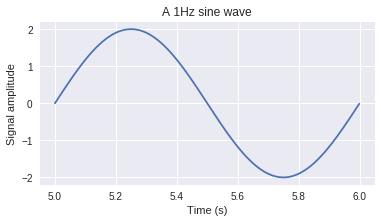

In [8]:
## Generating a sine wave of 1Hz and amplitude of 2:
sign1 = sineWave(1, 2, t)

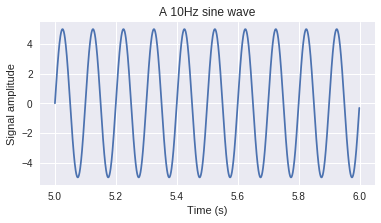

In [9]:
## Generating a sinus wave of 10Hz and amplitude of 5:
sign2 = sineWave(10, 5, t)